___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://static.wixstatic.com/media/aa08c3_4431b1d1a196452bb094eb2f08d4c4eb.png/v1/fit/w_620%2Ch_277%2Cal_c/file.png" width="350px" height="180px" />


# <font color= #8A0829> Data modelling lab </font>
- <Strong> Teacher: Sara Eugenia Rodríguez </Strong>
- <Strong> Year: </Strong>: 2023
___

<p style="text-align:right;"> Image from: https://static.wixstatic.com/media/aa08c3_4431b1d1a196452bb094eb2f08d4c4eb.png/v1/fit/w_620%2Ch_277%2Cal_c/file.png</p>

### <font color= #2E9AFE> Lineal regression</font>

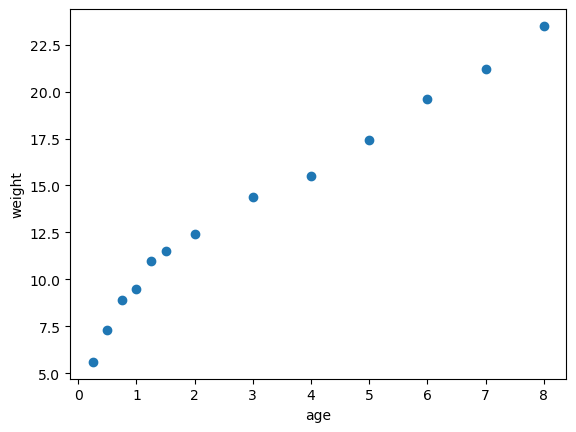

In [1]:
#Positive lineal relation
import matplotlib.pyplot as plt

age = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 3, 4, 5, 6, 7, 8]
weight = [5.6, 7.3, 8.9, 9.5, 11, 11.5, 12.4, 14.4, 15.5, 17.4, 19.6, 21.2, 23.5]
plt.scatter(age, weight)
plt.xlabel("age")
plt.ylabel("weight")
plt.show()

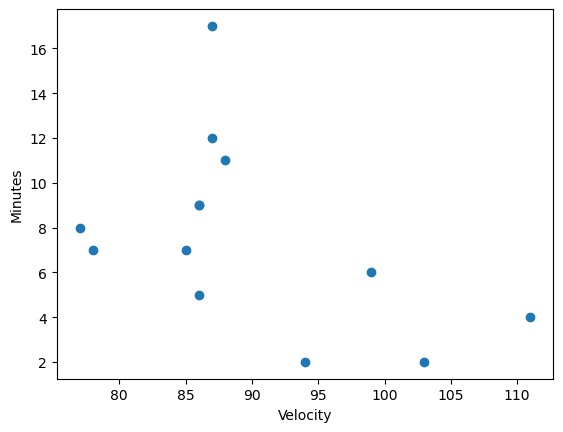

In [2]:
#Negative lineal regression
import matplotlib.pyplot as plt

minutes = [6, 9, 12, 11, 4, 9, 2, 17, 2, 7, 8, 7, 5]
velocity = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]
plt.scatter(velocity, minutes)
plt.xlabel("Velocity")
plt.ylabel("Minutes")
plt.show()


To calculate the closest line to the data we use
$$y=mx+b \rightarrow y=a_{0}+a_{1}x$$

Where:
- y= dependent variable
- x = independent variable
- $a_{0}$ = Linea intercept with y axis
- $a_{1}$ = Lineal regresion coefficient

In [3]:
#Apply lineal regression with scipy
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(velocity, minutes)

In [4]:
slope

-0.2056468314234433

Interpretation

For each unit increased in velocity, time decrease 0.2

In [5]:
intercept

26.076142482396797

Interpretation

If there was no increase, arrival time would be 26 min

In [6]:
#Manually getting first prediction
y_pred1 = -0.20564683142344337*99 +26.076142482396804
y_pred1

5.717106171475912

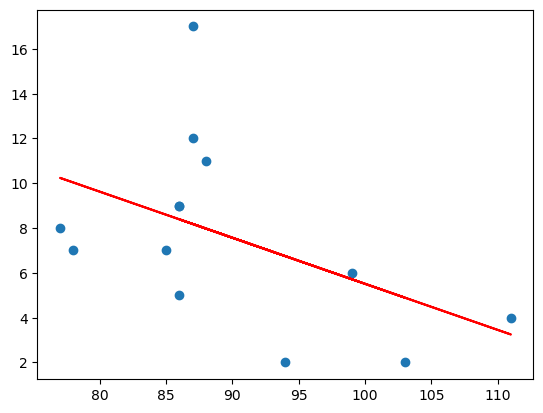

In [7]:
def linReg(x):
  return slope * x + intercept

mymodel = list(map(linReg, velocity))

plt.scatter(velocity, minutes)
plt.plot(velocity, mymodel, 'r')
plt.show()

Red line is the line that best adjusts to the data given

In [8]:
minutes

[6, 9, 12, 11, 4, 9, 2, 17, 2, 7, 8, 7, 5]

In [9]:
mymodel

[5.717106171475908,
 8.390514979980672,
 8.184868148557229,
 7.979221317133785,
 3.249344194394588,
 8.390514979980672,
 4.894518845782137,
 8.184868148557229,
 6.745340328593127,
 10.035689631368218,
 10.241336462791661,
 8.596161811404116,
 8.390514979980672]

#### Cost function


Helps determine best posible values for intercept and slope, and give us best adjusted line

Optimizes regression coefficients and measure the model performance

In lineal regression, cost function is median square error (MSE), that is the average squared error between actual values and predicted values

$$MSE = \frac{1}{N}\sum_{i=1}^{n}(y_{i}-(mx_{i}+b))^{2}$$

#### Gradient descent

Method that continiously updated a0 and a1 to minize MSE

Un modelo de regresión usa el gradiente descendiente para actualizar los coeficientes de la línea al reducir la función de costo mediante una selección aleatoria de valores de coeficientes y luego actualizar iterativamente los valores para alcanzar la función de costo mínimo.

Uses coefficient random selection to minimize cost function

**Examples**

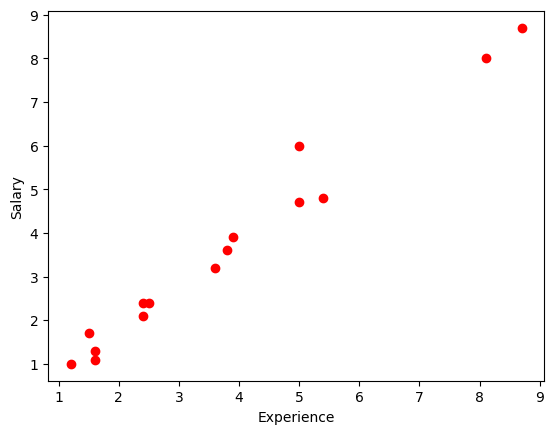

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

experience= np.array([2.4,5.0,1.5,3.8,8.7,3.6,1.2,8.1,2.5,5,1.6,1.6,2.4,3.9,5.4])
salary = np.array([2.1,4.7,1.7,3.6,8.7,3.2,1.0,8.0,2.4,6,1.1,1.3,2.4,3.9,4.8])
n = np.size(salary)
plt.scatter(experience,salary, color = 'red')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

Calculating coefficients:

1. Initialize parameters
2. Predict Y
3. Calculate MSE for all data predictions
4. Calculate partial derivate of cost function against a0 and a1
5. Calculate cost of each number and add them
6. Update a0 and a1 values

In [11]:
#Linear regression...
#Initialize parameters
a0 = 0                  #intercepto
a1 = 0                  #pendiente
lr = 0.0001             #tasa aprendizaje
iterations = 1000       #número de iteraciones
error = []              #calcular el costo para cada iteración.
for itr in range(iterations):
    error_cost = 0
    cost_a0 = 0
    cost_a1 = 0
    for i in range(len(experience)):
        y_pred = a0+a1*experience[i]   # predecir la Y para cada X dada
        error_cost = error_cost +(salary[i]-y_pred)**2
        for j in range(len(experience)):
            partial_wrt_a0 = -2 *(salary[j] - (a0 + a1*experience[j]))                #derivada parcial de a0
            partial_wrt_a1 = (-2*experience[j])*(salary[j]-(a0 + a1*experience[j]))   #derivada parcial de a1
            cost_a0 = cost_a0 + partial_wrt_a0      #calcular el costo para número y sumar
            cost_a1 = cost_a1 + partial_wrt_a1      #calcular el costo para número y sumar
        a0 = a0 - lr * cost_a0    #actualizar a0
        a1 = a1 - lr * cost_a1    #actualizar a1
        error.append(error_cost)      #arreglo con los errores
        
print(a0)
print(a1)

-0.21354150071690242
1.0247464287610857


In [12]:
#with numpy 
experience1= np.squeeze(np.array(experience))
salary1 =np.squeeze(np.array(salary))

modelo_numpy = np.polyfit(experience1, salary1, 1)
modelo_numpy

array([ 1.02474643, -0.2135415 ])

In [13]:
#Predict salary with the coefficients we just found
pred = a0+a1*experience
print(pred)

[2.24584993 4.91019064 1.32357814 3.68049493 8.70175243 3.47554564
 1.01615421 8.08690457 2.34832457 4.91019064 1.42605279 1.42605279
 2.24584993 3.78296957 5.32008921]


In [14]:
salary

array([2.1, 4.7, 1.7, 3.6, 8.7, 3.2, 1. , 8. , 2.4, 6. , 1.1, 1.3, 2.4,
       3.9, 4.8])

Text(0, 0.5, 'salary')

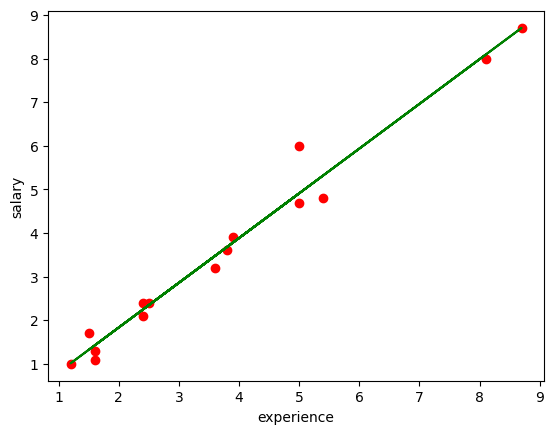

In [15]:
#Plotting
plt.scatter(experience,salary,color = 'red')
plt.plot(experience,pred, color = 'green')
plt.xlabel("experience")
plt.ylabel("salary")

In [16]:
#How good is my model

#MSE
error1 = salary - pred
se = np.sum(error1 ** 2)
mse = se/n
print("Median squared error (MSE) is:", mse)

Median squared error (MSE) is: 0.12785817711928918


In [17]:
#R2
pred = np.poly1d(modelo_numpy)
yhat = pred(experience)                       
ybar = np.sum(salary)/len(salary)          
sstot = np.sum((salary - ybar)**2) 
ssreg = np.sum((yhat-ybar)**2)  
results = ssreg / sstot
print("R2 is:", results)

R2 is: 0.9763272358942764


There's a faster way with sklearn

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [19]:
experience = experience.reshape(-1,1)

model = LinearRegression()

model.fit(experience,salary)

salary_pred = model.predict(experience)

print(mean_squared_error(salary,salary_pred))

0.12785817711928915


In [20]:
print('Slope:',model.coef_[0])

Slope: 1.024746428761086


In [21]:
print('intercept:',model.intercept_)

intercept: -0.21354150071690547


**How is it interpret?**

*Coefficients:* For each additional year a person works, salary increases 1.024


*R2:* Experience explains 97% of the person's variance

But first, we use train-test split

In [22]:
#train-test

X_train, X_test, y_train, y_test = train_test_split(experience,salary,test_size=.30,random_state=5)


model = LinearRegression()

model.fit(X_train,y_train)

salary_pred = model.predict(X_test)

print(mean_squared_error(y_test,salary_pred))

0.09640474566825234


In [23]:
#R^2 
r2 = r2_score(y_test, salary_pred)
print("R2", r2)

R2 0.9841917969191505


In [24]:
#How much someone with 20 years of experience should earn
new_pred = model.predict([[20]])
print(new_pred)

[20.61444944]


In [25]:
#cross validation
from sklearn.model_selection import cross_val_score


cross_result = (-cross_val_score(model,experience,salary,cv=10,scoring='neg_root_mean_squared_error')).mean()
print(cross_result)

0.30610210474453664


### Regularization

Is adding a penalty term to coefficients. Works when you have more than one predictor variable

#### Ridge Regression

Add penalty to variables to reduce their beta size 

$$Ridge = \sum_{i=1}^{n}(y_{i}-f(x_{i}))^{2}+\lambda\sum_{j=1}^{p}\beta_{j}^{2}$$

**¿When it's recommended?**
When we have few data, because it improves predictions with new data by making predictions less impacted by train data

In [26]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1)

#Ridge
clf.fit(experience,salary)

#Predicting
salary_pred = clf.predict(experience)

#Performance
Mse = mean_squared_error(salary, salary_pred)
r2 = r2_score(salary, salary_pred)
print("MSE", Mse)
print("R2", r2)

MSE 0.1287633941097913
R2 0.9761596362243647


In [27]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(experience, salary, test_size=0.3, random_state=5)
model = Ridge(alpha=1)
model.fit(X_train,y_train)
salary_pred = model.predict(X_test)
Mse = mean_squared_error(y_test, salary_pred)
print("MSE", Mse)
r2 = r2_score(y_test, salary_pred)
print("R2", r2)

MSE 0.08712333478470628
R2 0.9857137388848376


In [28]:
#Cross Validation
from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas=np.arange(0.01,1,0.01), cv=10, scoring='neg_mean_squared_error') 
model.fit(experience, salary)
print('alpha: %f' % model.alpha_)
print('MSE',-model.best_score_)

alpha: 0.430000
MSE 0.14537064440575015


#### LASSO Regularization

Lasso advantage is that it makes certain coefficients 0
$$LASSO = \sum_{i=1}^{n}(y_{i}-f(x_{i}))^{2}+\lambda\sum_{j=1}^{p}|\beta_{j}|$$

In [29]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=1)
clf.fit(experience,salary)
salary_pred = clf.predict(experience)
Mse = mean_squared_error(salary, salary_pred)
r2 = r2_score(salary, salary_pred)
print("MSE", Mse)
print("R2", r2)

MSE 0.3269978935443332
R2 0.9394567936806927


In [30]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(experience, salary, test_size=0.3, random_state=5)
model = Lasso(alpha=.03)
model.fit(X_train,y_train)
salary_pred = model.predict(X_test)
Mse = mean_squared_error(y_test, salary_pred)
print("MSE", Mse)
r2 = r2_score(y_test, salary_pred)
print("R2", r2)

MSE 0.09302973548965884
R2 0.9847452224370886


In [31]:
#Cross Validation
from sklearn.linear_model import LassoCV
model = LassoCV(alphas=np.arange(0.01,1,0.01), cv=10, random_state=5).fit(experience, salary) 
print('lambda: %f' % model.alpha_)
print('R2',model.score(experience, salary))

lambda: 0.030000
R2 0.9762940524962838


Lasso cross-validation by default uses R2 score

**¿When to uses each of them?**
- Ridge is better when all my variables are useful or when i don't have a lot of variables
- LASSO is better when I have more variables